In [906]:
from googleapiclient.discovery import build
import pandas as pd
from IPython.display import JSON

#data libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
api_key = '...'

In [ ]:
#mrbeast channel id 
channel_ids = ['UCX6OQ3DkcsbYNE6H8uQQuVA']

In [ ]:
api_service_name = "youtube"
api_version = "v3"
# Get credentials and create an API client
youtube = build(
        api_service_name, api_version, developerKey=api_key)

In [ ]:

def get_channel_stats(youtube, channel_ids):
    all_data = []

    request = youtube.channels().list( 
        part="snippet,statistics,contentDetails",
        id=",".join(channel_ids) 
    )
    response = request.execute()

    for item in response.get('items', []): 
        data = {
            'channelName': item['snippet'].get('title', 'N/A'),
            'subscribers': item['statistics'].get('subscriberCount', 'N/A'),
            'views': item['statistics'].get('viewCount', 'N/A'),
            'totalVideos': item['statistics'].get('videoCount', 'N/A'),
            'playlistId': item['contentDetails']['relatedPlaylists'].get('uploads', 'N/A')
        }
        all_data.append(data)

    return pd.DataFrame(all_data)



In [911]:
channel_stats = get_channel_stats(youtube, channel_ids)

In [912]:
channel_stats


,channelName,subscribers,views,totalVideos,playlistId
0,MrBeast,366000000,73712381668,849,UUX6OQ3DkcsbYNE6H8uQQuVA


In [913]:
playlist_id = "UUX6OQ3DkcsbYNE6H8uQQuVA"

def get_video_ids(youtube, playlist_id):
    video_ids = []

    request = youtube.playlistItems().list(
        part="snippet,contentDetails",
        playlistId=playlist_id,
        maxResults = 50
    )
    response = request.execute()

    for item in response['items']:
       video_ids.append(item['contentDetails']['videoId'])

    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId = playlist_id,
            maxResults = 50,
            pageToken = next_page_token)
        response = request.execute()

        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')

    return video_ids


In [914]:
video_ids = get_video_ids(youtube, playlist_id)

In [915]:
len(video_ids)

849

In [916]:
def get_video_details(youtube, video_ids):
    
    all_video_info = []

    for i in range(0, len(video_ids),50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])
        )
        response = request.execute()

        for video in response['items']:
            statistics_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                          'statistics': ['viewCount', 'likeCount', 'favouriteCount', 'commentCount'],
                          'contentDetails': ['duration', 'definition', 'caption']
                          }
            video_info = {}
            video_info['video_id'] = video['id']

            for k in statistics_to_keep.keys():
                for v in statistics_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)

    return pd.DataFrame(all_video_info)

In [ ]:
#video details
video_df = get_video_details(youtube, video_ids)
video_df 

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption
0,PuQ5UxKUY48,MrBeast,"Find The Human, Win $10,000",,None,2025-02-24T17:00:02Z,131878,186624,None,1036,PT41S,hd,false
1,L5ihmu87xTE,MrBeast,"Find This Stranger, Win $10,000",,None,2025-02-19T18:00:00Z,132183891,7516834,None,6513,PT1M1S,hd,false
2,nAiKLoCP-kU,MrBeast,"Reach the Money, Win $10,000",,None,2025-02-14T18:15:00Z,104431994,4002842,None,5370,PT25S,hd,false
3,NDsO1LT_0lw,MrBeast,I Spent 100 Hours Inside The Pyramids!,I can’t believe we were allowed to do this\nSe...,None,2025-02-08T17:00:00Z,136873136,4472111,None,89265,PT21M43S,hd,true
4,sF5LYGgKbUA,MrBeast,Every Minute One Person Is Eliminated,Watch Beast Games now on Prime Video: https://...,None,2025-01-25T17:00:01Z,91799055,2551837,None,69180,PT34M46S,hd,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,7qj3nuF9Dzw,MrBeast,Most Epic minecraft skin EVER (Psy),Psy in minecraft!!! drop a like for psy's mo...,"[psy, minecraft, epic, skin, most, ever]",2013-01-13T01:59:21Z,1144954,42274,None,3574,PT31S,hd,false
845,Y74b7WlcEpk,MrBeast,More birds IN MINECRAFT!!,Basically what this mod does is adds more bird...,"[birds, minecraft, in, more, must, see, epic]",2013-01-12T23:35:45Z,1289360,47602,None,3785,PT2M6S,hd,false
846,Z8nEEdXTaX0,MrBeast,Boxy item mod Minecraft. EPIC,At the begining i said i was mrbeast6000.... i...,"[boxy, item, mod, minecraft, epic]",2013-01-12T22:34:11Z,1519122,56118,None,4257,PT1M30S,hd,false
847,jP82d277Cc8,MrBeast,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,One of the coolest mods i have ever seen\n\nMo...,"[Harry Potter minecraft, minecraft, minecraft ...",2012-03-09T23:29:03Z,5692636,None,None,9209,PT3M59S,hd,false


In [918]:
video_df.isnull().any()

video_id          False
channelTitle      False
title             False
description       False
tags               True
publishedAt       False
viewCount         False
likeCount          True
favouriteCount     True
commentCount       True
duration          False
definition        False
caption           False
dtype: bool

In [919]:
video_df.dtypes

video_id          object
channelTitle      object
title             object
description       object
tags              object
publishedAt       object
viewCount         object
likeCount         object
favouriteCount    object
commentCount      object
duration          object
definition        object
caption           object
dtype: object

In [920]:
numeric_cols = ['viewCount', 'likeCount']
video_df[numeric_cols] = video_df[numeric_cols].apply(pd.to_numeric, errors= 'coerce', axis = 1)

In [921]:
from dateutil import parser
#publish day in the week 
video_df['publishedAt'] = video_df['publishedAt'].apply(lambda x: parser.parse(x))
video_df['publishDayName'] = video_df['publishedAt'].apply(lambda x: x.strftime("%A"))


In [922]:
#convert youtube duration to seconds 
import isodate
video_df['durationSeconds'] = video_df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())


In [923]:
video_df[['durationSeconds', 'duration']]

,durationSeconds,duration
0,41.0,PT41S
1,61.0,PT1M1S
2,25.0,PT25S
3,1303.0,PT21M43S
4,2086.0,PT34M46S
...,...,...
844,31.0,PT31S
845,126.0,PT2M6S
846,90.0,PT1M30S
847,239.0,PT3M59S


In [924]:
#apend tag count
video_df['tagCount'] = video_df['tags'].apply(lambda x: 0 if x is None else len(x)) 

In [925]:
video_df

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,commentCount,duration,definition,caption,publishDayName,durationSeconds,tagCount
0,PuQ5UxKUY48,MrBeast,"Find The Human, Win $10,000",,None,2025-02-24 17:00:02+00:00,131878.0,186624.0,None,1036,PT41S,hd,false,Monday,41.0,0
1,L5ihmu87xTE,MrBeast,"Find This Stranger, Win $10,000",,None,2025-02-19 18:00:00+00:00,132183891.0,7516834.0,None,6513,PT1M1S,hd,false,Wednesday,61.0,0
2,nAiKLoCP-kU,MrBeast,"Reach the Money, Win $10,000",,None,2025-02-14 18:15:00+00:00,104431994.0,4002842.0,None,5370,PT25S,hd,false,Friday,25.0,0
3,NDsO1LT_0lw,MrBeast,I Spent 100 Hours Inside The Pyramids!,I can’t believe we were allowed to do this\nSe...,None,2025-02-08 17:00:00+00:00,136873136.0,4472111.0,None,89265,PT21M43S,hd,true,Saturday,1303.0,0
4,sF5LYGgKbUA,MrBeast,Every Minute One Person Is Eliminated,Watch Beast Games now on Prime Video: https://...,None,2025-01-25 17:00:01+00:00,91799055.0,2551837.0,None,69180,PT34M46S,hd,true,Saturday,2086.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,7qj3nuF9Dzw,MrBeast,Most Epic minecraft skin EVER (Psy),Psy in minecraft!!! drop a like for psy's mo...,"[psy, minecraft, epic, skin, most, ever]",2013-01-13 01:59:21+00:00,1144954.0,42274.0,None,3574,PT31S,hd,false,Sunday,31.0,6
845,Y74b7WlcEpk,MrBeast,More birds IN MINECRAFT!!,Basically what this mod does is adds more bird...,"[birds, minecraft, in, more, must, see, epic]",2013-01-12 23:35:45+00:00,1289360.0,47602.0,None,3785,PT2M6S,hd,false,Saturday,126.0,7
846,Z8nEEdXTaX0,MrBeast,Boxy item mod Minecraft. EPIC,At the begining i said i was mrbeast6000.... i...,"[boxy, item, mod, minecraft, epic]",2013-01-12 22:34:11+00:00,1519122.0,56118.0,None,4257,PT1M30S,hd,false,Saturday,90.0,5
847,jP82d277Cc8,MrBeast,Harry Potter Mod In Minecraft! EPIC MUST SEE M...,One of the coolest mods i have ever seen\n\nMo...,"[Harry Potter minecraft, minecraft, minecraft ...",2012-03-09 23:29:03+00:00,5692636.0,NaN,None,9209,PT3M59S,hd,false,Friday,239.0,6


In [926]:
#EDA#

/var/folders/6q/cljn37210zq9l2hkb0jwgv580000gn/T/ipykernel_4542/2929613467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='viewCount', data=video_df.nlargest(7, 'viewCount'),palette='Set2')


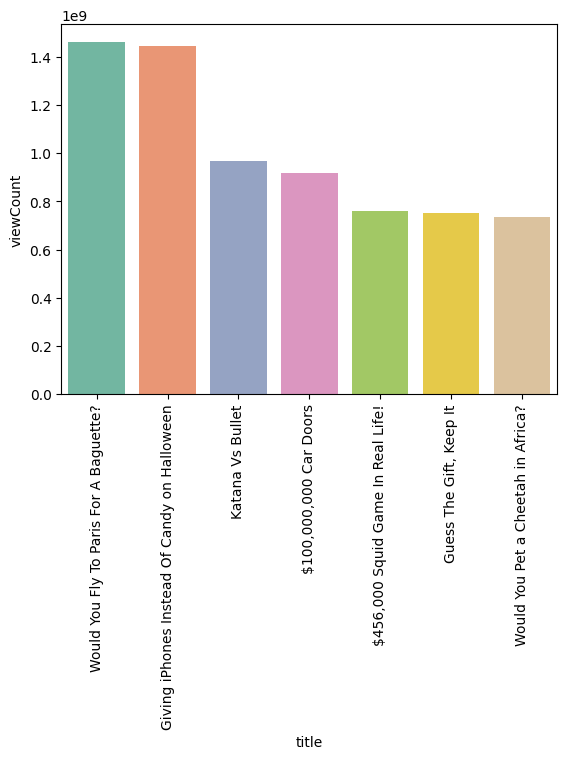

In [927]:
#BEST VIDEOS 
sns.barplot(x='title', y='viewCount', data=video_df.nlargest(7, 'viewCount'),palette='Set2')  
plt.xticks(rotation=90)  
plt.show()


/var/folders/6q/cljn37210zq9l2hkb0jwgv580000gn/T/ipykernel_4542/2324731117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='viewCount', data=video_df.nsmallest(7, 'viewCount'),palette='Set1')


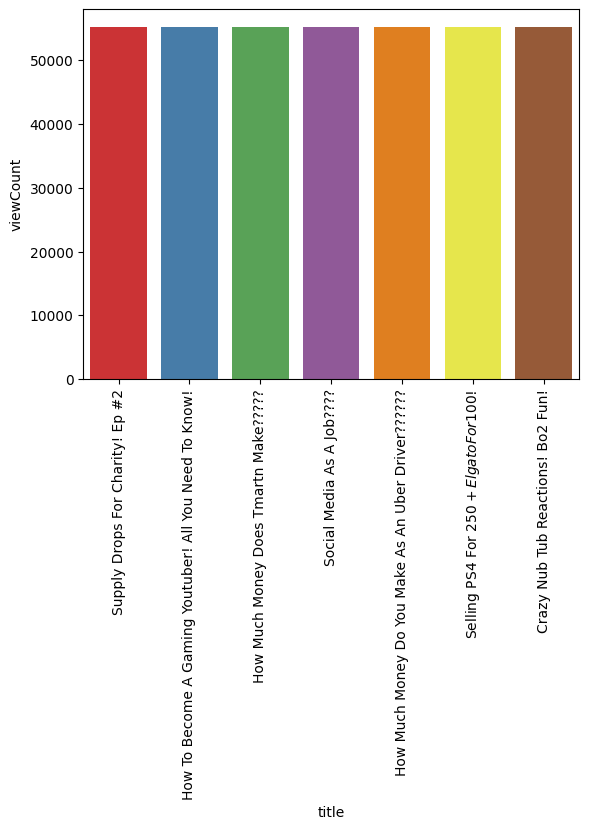

In [928]:
#WORST VIDEOS 
sns.barplot(x='title', y='viewCount', data=video_df.nsmallest(7, 'viewCount'),palette='Set1')  
plt.xticks(rotation=90)  
plt.show()

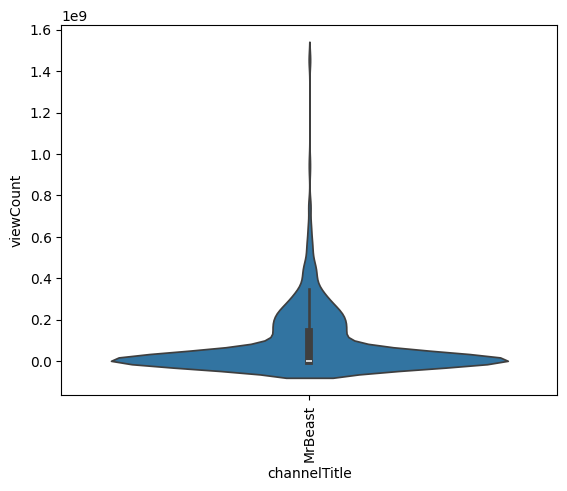

In [929]:
#View distribution per video
sns.violinplot(x='channelTitle', y='viewCount', data=video_df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='likeCount', ylabel='viewCount'>

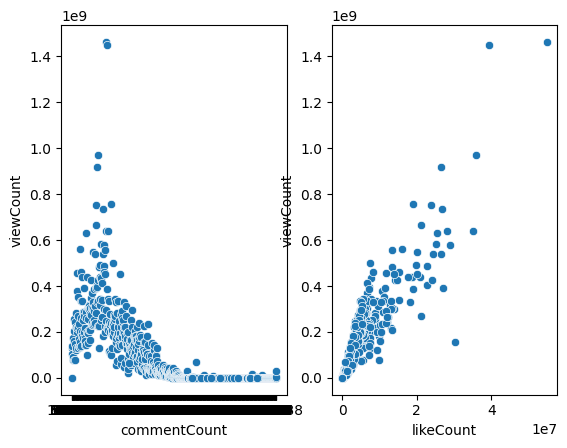

In [930]:
#views-comments relationship
fig, ax = plt.subplots(1,2)
sns.scatterplot(data = video_df, x='commentCount', y='viewCount', ax = ax[0])
sns.scatterplot(data = video_df, x ='likeCount', y='viewCount', ax = ax[1])

(0.0, 200.0)

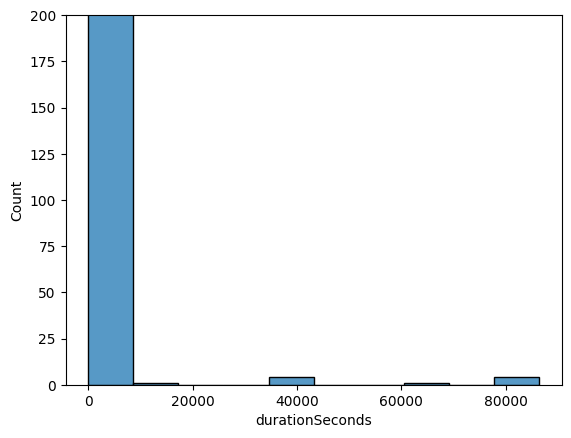

In [931]:
#video duration
sns.histplot(data=video_df, x='durationSeconds', bins=10)  
plt.ylim(0, 200) 


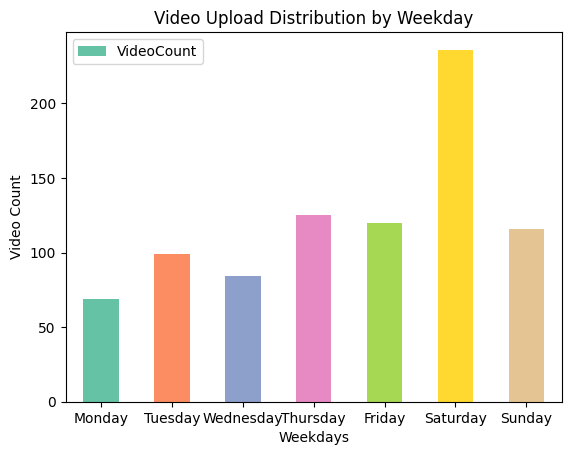

In [932]:
#uploading
day_df = pd.DataFrame(video_df['publishDayName'].value_counts())
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
day_df = day_df.reset_index() 
day_df.columns = ['Weekday', 'VideoCount']
ax = day_df.plot.bar(x='Weekday', y='VideoCount', rot=0, color=sns.color_palette('Set2', len(day_df)))
plt.xlabel('Weekdays')  
plt.ylabel('Video Count') 
plt.title('Video Upload Distribution by Weekday')
plt.show()